<a href="https://colab.research.google.com/github/firdauszahrin/Machine-Learning/blob/Phd/Malay_FULL_AMB_RS_POS_ADJ_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

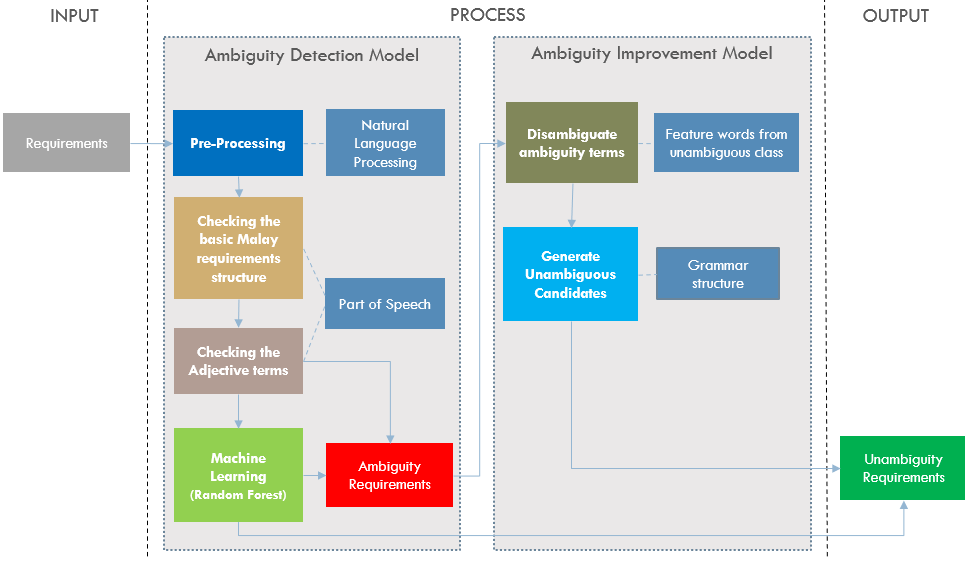

Warren (1988) AMBIGUITY AND VAGUENESS IN ADJECTIVES 
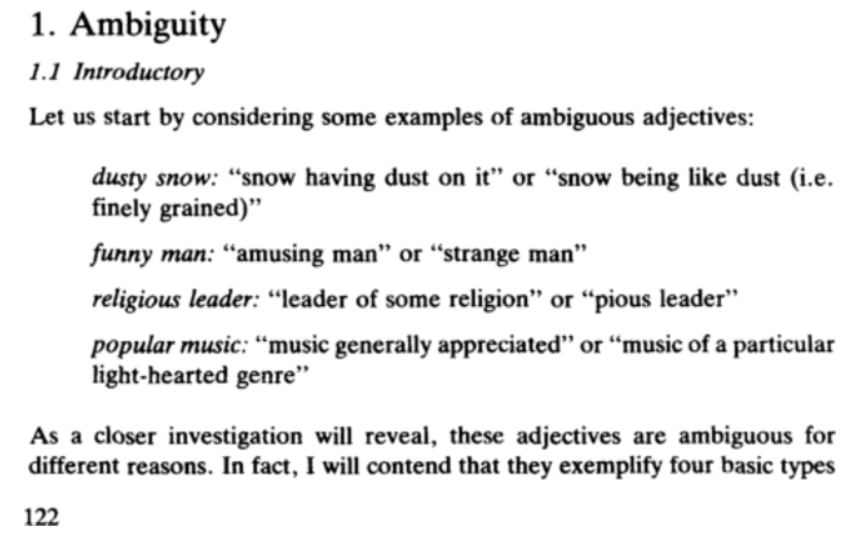

Gleich et al. (2010) Ambiguity patterns with source and level of detection. Sources: AH=Ambiguity Handbook: 
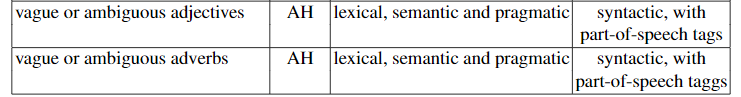

In [2]:
pip install malaya

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 27.2 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 
     |████████████████████████████████| 5.3 MB 56.0 MB/s 
     |████████████████████████████████| 235 kB 58.8 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 1.3 MB 47.3 MB/s 
     |████████████████████████████████| 288 kB 75.8 MB/s 
     |████████████████████████████████| 163 kB 76.0 MB/s 
     |████████████████████████████████| 749 kB 67.1 MB/s 
     |████████████████████████████████| 41 kB 249 kB/s 
     |████████████████████████████████| 7.6 MB 49.6 MB/s 
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50467 sha256=8681af89eab690b8d64970535f472ef7489c69716daaf7541ff4dcd48349f154
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef


In [9]:
# enable debugging
import cgitb
cgitb.enable()

import sys
#import os
import time
import re

#get the start time
st = time.time()

#input_data = "sistem akan menyemak samada sistem telah dikonfigurasikan supaya menjana sat secara automatik selepas maklumbalas disimpan."
#input_data = "Sistem memproses maklumat dengan cepat dan pantas serta berintegriti."
#input_data = "Sistem memproses."
#input_data = "Sistem memproses maklumat kurang dari 5 saat."
#input_data = "Sistem memproses maklumat kurang dari 5 saat, cepat dan pantas."
#input_data = "Sistem memproses maklumat dengan pantas dan cepat sekali dengan kemahuan serta keupayaan masing-masing"
#input_data = "Sistem memproses maklumat yang mempunyai antaramuka yang menarik dan ramah pengguna"
#input_data = "sistem hendaklah berupaya memberikan maklumbalas permintaan pengguna kurang dari 10 saat"
#input_data = "Memastikan carian akaun pengguna dapat dilakukan dengan lebih mudah dan cepat."
input_data = "Pengguna memasukkan maklumat yang ingin dicari."

s1=re.sub("[$@&'.,!()#]","",input_data)
input_data = s1.lower() 

#split so each word have their own string
input_data = input_data.split()
#print(input_data)

newlen = len(input_data)
#print("<br/>LENGHT: ", newlen)

if (newlen < 3):
    print("This statement has less than 3 words. It is not a requirement.<br/>") #less than 3 words is not a basic requirement
else:
    print("This statement has more than 2 words.<br/>") #a basic requirement has 3 words
  
    id_new = ' '.join(input_data)
    #print(len(id_new))
    #print(id_new)
  
    import malaya.pos
    model = malaya.pos.transformer(model = 'tiny-albert') #chose XLNET model : highest F1-score
    
    j=0
    w_adj=[]
    for adj in model.predict(id_new):
        if (adj[1] == 'ADJ'):
            w_adj.append(adj[0])
            j=j+1
                
    if (j > 0):
        print ("This statement contain(s) ",j," Adjective(s).<br/>")
        for o in w_adj: 
            print("<ol>",o,"</ol>")
        print("Therefore, this statement is an <strong>Ambiguous Requirement</strong>.<br/>")
    else:
                
        #print("NO ADJ")
        
        #keep the value contain the NOUN or VERB
        mod_pos=[]
        mod_rs=[]

        for i in model.predict(id_new):
            #print(i[0],"-",i[1])
            if (i[1] == 'NOUN' or i[1] == 'VERB'):
                mod_pos.append(i[1])
                mod_rs.append(i[0])

        #for n in mod_pos: 
            #print(n)

        #Trigram pattern to check the basic Malay requirement structure
        #NOUN VERB NOUN (subject verb object)
        j=0
        x=0
        limit = len(mod_pos)-3

        #print("<br/>")

        while j <= limit:
            #print("j: ",j, "limit:" ,limit,"<br/>")
            if (mod_pos[j] == 'NOUN' and mod_pos[j+1] == 'VERB' and mod_pos[j+2] == 'NOUN'):
                print((x+1),") "+mod_rs[j]," ("+mod_pos[j]+") "+mod_rs[j+1]," ("+mod_pos[j+1]+") "+mod_rs[j+2]," ("+mod_pos[j+2]+").<br/>")
                x=x+1
            j=j+1
        
        if x > 0:
            print("This statement complies with the basic requirement (Subject Verb Object).<br/>")

            import pandas as pd
            import sklearn as sk
            import numpy as np
            import math 

            from sklearn.feature_extraction.text import CountVectorizer
            from sklearn.feature_extraction.text import TfidfTransformer
            from sklearn.feature_extraction.text import TfidfVectorizer

            #load and read the data set (feature words & classes)
            #pull dataset from Google Drive
            words = pd.read_csv('/content/drive/Othercomputers/My Lucro PC/UPM/OneDrive - Universiti Putra Malaysia/PhD/Experiment/Feature Selection_25042022/Dataset/20% features/wo_memaparkan/SMOTE/RS2_20%_SMOTE_TF.csv')
            #words = pd.read_csv('RS2_20%_SMOTE_TF.csv') 
            #print(words.head(5))

            #Create a dataframe for feature words 
            df = pd.DataFrame(words, columns=words.columns)

            #choose the feature words
            fw = pd.DataFrame([df.columns[:-1]])
            #print(fw)

            #training the data set
            df['is_train'] = np.random.uniform(0, 1, len(df)) <= 1 #.99

            #create the fw in array format
            fw_arr = []
            for m in fw:
                fw_arr.append([fw.iloc[0,m],0])

            c = 0
            while c < len(fw_arr):
                #print(fw_arr[c][0],",",fw_arr[c][1])
                for z in input_data:
                    if fw_arr[c][0] == z: #compare the fw with input data (RS)
                        fw_arr[c][1] = fw_arr[c][1] + 1  #count the terms
                        #print(fw_arr[c][0],",",fw_arr[c][1])

                c=c+1

            #for x in fw_arr: #display the fw with term frequencies
                #print(x)

            #Term Frequency for a requirement (input data)
            word_fit=[]
            v = 0

            while v < len(fw_arr):
                #print(fw_arr[v][1])
                word_fit.append(fw_arr[v][1])

                v=v+1

            #Term Frequency for a requirement (input)
            #print(word_fit)

            #Create two new dataframes, one with the training rows, one with the test rows
            train, test = df[df['is_train']==True], df[df['is_train']==False]

            #Show the number of observations for the test and training dataframes
            #print('Number of observations in the training data:', len(train))

            #Create a list of the feature words column's names
            features = df.columns[:-2]
            #print(features) #340 no. of FW

            #features
            # train['CLASS'] contains the string value. Before we can use it,
            # we need to convert each string into a numeric value. So, in this case there
            # are 2 values, which have been coded as 0 (Y - unambiguity) or 1 (N - ambiguity).
            y = train['class_name']

            from sklearn.ensemble import RandomForestClassifier
            from sklearn.metrics import accuracy_score
            from sklearn.model_selection import train_test_split

            #create Random Forest classifier
            clf = RandomForestClassifier()

            # Train the classifier to take the training features and learn how they relate
            # to the training y = (train['class_name'])
            clf = clf.fit(train[features], y)

            #term frequencies of a requirement (input data) as a test features
            test_features = np.array([word_fit])
            test_features = test_features.reshape(1,-1)

            #prediction on test data based on trained data
            prediction = clf.predict(test_features)

            #predict the output
            prediction = prediction.tolist() 

            #print("RandomForestClassifier predicts:", prediction) # 0 (unambiguity) or 1 (ambiguity)

            #print('"',ori_data,'" is an')
            #print('"',id_new,'" is an')
            print ("<br/>Prediction: ")

            if prediction[0] == 'Ambiguity':
                print ("<strong>Ambiguous requirement.</strong><br/>")

            elif prediction[0] == 'Unambiguity':
                print ("<strong>Unambiguous requirement.</strong><br/>")

            print('<br/><table class="table table-bordered"><thead><tr><th>#</th><th>Feature word(s)</th><th>No. of occurrence(s)</th></tr></thead><tbody>')
            k=0
            zek=0
            for s in fw_arr:
                if fw_arr[k][1] > 0: #check the TF if exist more than 0
                    #print("<br/>",fw_arr[k][0],"-",fw_arr[k][1]) #print the feature words and TF
                    zek=zek+1
                    print('<tr><td>',zek,'</td><td>',fw_arr[k][0],'</td><td><center>',fw_arr[k][1],'</center></td></tr>')
                k=k+1

        else:
            print("This statement does NOT comply with the basic requirement (Subject Verb Object).<br/>")
        
    
# get the end time
et = time.time()

#print('ST:',st,'<br/>')
#print('ET:',et,'<br/>')

# get the execution time
elapsed_time = et - st

print('<br/>Execution time:',elapsed_time,'seconds')

This statement has more than 2 words.<br/>
1 ) pengguna  (NOUN) memasukkan  (VERB) maklumat  (NOUN).<br/>
This statement complies with the basic requirement (Subject Verb Object).<br/>
<br/>Prediction: 
<strong>Ambiguous requirement.</strong><br/>
<br/><table class="table table-bordered"><thead><tr><th>#</th><th>Feature word(s)</th><th>No. of occurrence(s)</th></tr></thead><tbody>
<tr><td> 1 </td><td> ingin </td><td><center> 1 </center></td></tr>
<tr><td> 2 </td><td> maklumat </td><td><center> 1 </center></td></tr>
<tr><td> 3 </td><td> memasukkan </td><td><center> 1 </center></td></tr>
<tr><td> 4 </td><td> pengguna </td><td><center> 1 </center></td></tr>
<tr><td> 5 </td><td> yang </td><td><center> 1 </center></td></tr>
<br/>Execution time: 2.2139973640441895 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
